# The Problem Description: 
    Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors. 
    
# Data Description: 
    
    The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 
        
# Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

# 1. Import the Libraries 

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf


Using TensorFlow backend.


# 2. Load the data

In [2]:
# #reading file in google collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # with open('/content/drive/My Drive/SVHN_single_grey1.h5', 'w') as f:
# #    f.write('SVHN_single_grey1.h5')
# # print ('Files in Drive:')
# # !ls /content/drive/
# rawdata=h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5",'r')


In [3]:
#reading file locally
# Open the file as readonly
rawdata = h5py.File('SVHN_single_grey1.h5', 'r')


In [4]:
#Loading the training, testing, and validation data
X_train=rawdata['X_train']
X_test=rawdata['X_test']
X_val=rawdata['X_val']
y_train=rawdata['y_train']
y_test=rawdata['y_test']
y_val=rawdata['y_val']

In [5]:
# Let's understand the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


#### Let's see the raw images

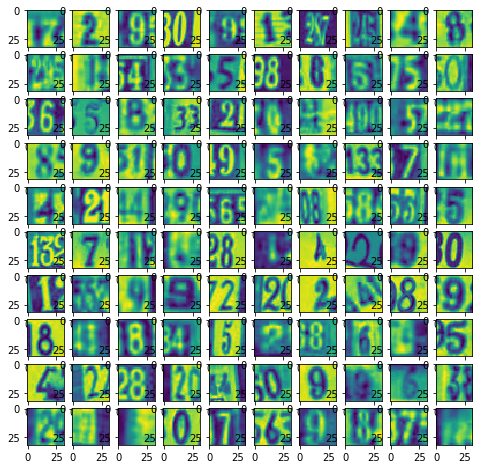

In [6]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img) #imgshow function shows images
plt.show()

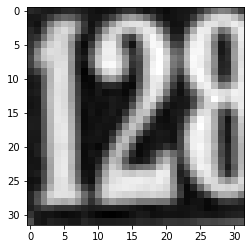

Label:  2


In [7]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

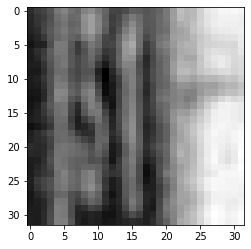

Label:  1


In [8]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

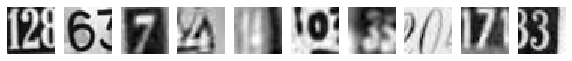

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# first 10 images in the training dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

#  Preparing data for Neural Network

In [10]:
# Converting data from matrix to series. ANN requires this input to be prepared as series on values
# Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [11]:
# Let's understand the shape and data type of training, testing, and validation data
print("Reshaped Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Reshaped Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Reshaped Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)

Reshaped Training data X-- Shape : (42000, 1024) and Data Type :  float32
Reshaped Testing data X-- Shape : (18000, 1024) and Data Type :  float32
Reshaped Validation data X-- Shape : (60000, 1024) and Data Type :  float32


# Converting output label to multiple values
#We need to do categorical encoding for the labels we are detecting digits 1-10 so we will have 10 classes. Categorical encoding provides more information while training

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print("Shapes of prepared datasets")
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

Shapes of prepared datasets
(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## Implementing Neural Network 

In [13]:
##Initialize the Artificial Neural Network Classifier
#https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/
keras_model = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
#using he_uniform beacuse of this https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404
keras_model.add(Dense(514,activation='relu', kernel_initializer='he_uniform',input_shape = (1024, )))   #512 + adding  2 node for bias
keras_model.add(BatchNormalization())
#Hidden Layer 1
keras_model.add(Dense(262,activation='relu', kernel_initializer='he_uniform'))  # mean(#inputlayer+#output layer)=262
keras_model.add(BatchNormalization())
#Hidden Layer 2
keras_model.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))  # mean(#inputlayer+#output layer)=262
keras_model.add(BatchNormalization())
# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10,activation='softmax'))
# Here, we are using softmax function because we have multiclass classsification
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 514)               526850    
_________________________________________________________________
batch_normalization_1 (Batch (None, 514)               2056      
_________________________________________________________________
dense_2 (Dense)              (None, 262)               134930    
_________________________________________________________________
batch_normalization_2 (Batch (None, 262)               1048      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

#### Using sgd optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
#going with ADAM because of this link
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/

In [14]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 322us/step - loss: 2.0518 - accuracy: 0.3201 - val_loss: 1.7858 - val_accuracy: 0.4028
Epoch 2/10
42000/42000 [==============================] - 11s 273us/step - loss: 1.3485 - accuracy: 0.5811 - val_loss: 1.3040 - val_accuracy: 0.5933
Epoch 3/10
42000/42000 [==============================] - 11s 268us/step - loss: 1.0808 - accuracy: 0.6763 - val_loss: 1.1234 - val_accuracy: 0.6593
Epoch 4/10
42000/42000 [==============================] - 11s 270us/step - loss: 0.9341 - accuracy: 0.7219 - val_loss: 1.0444 - val_accuracy: 0.6868
Epoch 5/10
42000/42000 [==============================] - 13s 299us/step - loss: 0.8392 - accuracy: 0.7496 - val_loss: 0.9427 - val_accuracy: 0.7219
Epoch 6/10
42000/42000 [==============================] - 12s 282us/step - loss: 0.7722 - accuracy: 0.7695 - val_loss: 0.9284 - val_accuracy: 0.7217
Epoch 7/10
42000/42000 [==============================] 

In [16]:
results_1 = keras_model.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 7s 114us/step
Val_acc using Batch ANN adam :  0.7613666653633118


## Implementing Dropout for training the neural network 

In [17]:
##Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

#### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [18]:
##Initialize the Artificial Neural Network Classifier
#https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/
keras_model_2 = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
#using he_uniform beacuse of this https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404
keras_model_2.add(Dense(514,activation='relu', kernel_initializer='he_uniform',input_shape = (1024, )))   #512 + adding  2 node for bias
keras_model_2.add(Dropout(0.5))
#Hidden Layer 1
keras_model_2.add(Dense(262,activation='relu', kernel_initializer='he_uniform'))  # mean(#inputlayer+#output layer)=262
keras_model_2.add(Dropout(0.5))
#Hidden Layer 2
keras_model_2.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))  # mean(#inputlayer+#output layer)=262
keras_model_2.add(Dropout(0.5))
# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10,activation='softmax'))
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 514)               526850    
_________________________________________________________________
dropout_1 (Dropout)          (None, 514)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 262)               134930    
_________________________________________________________________
dropout_2 (Dropout)          (None, 262)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [19]:
#Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# Fitting the ANN to the Training data
history3 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 265us/step - loss: 60.8264 - accuracy: 0.1001 - val_loss: 2.5810 - val_accuracy: 0.1054
Epoch 2/10
42000/42000 [==============================] - 10s 239us/step - loss: 3.0422 - accuracy: 0.0996 - val_loss: 2.3818 - val_accuracy: 0.1033
Epoch 3/10
42000/42000 [==============================] - 10s 231us/step - loss: 2.5827 - accuracy: 0.1000 - val_loss: 2.3430 - val_accuracy: 0.1033
Epoch 4/10
42000/42000 [==============================] - 10s 238us/step - loss: 2.4657 - accuracy: 0.1008 - val_loss: 2.3256 - val_accuracy: 0.1027
Epoch 5/10
42000/42000 [==============================] - 10s 237us/step - loss: 2.4036 - accuracy: 0.1012 - val_loss: 2.3169 - val_accuracy: 0.1018
Epoch 6/10
42000/42000 [==============================] - 10s 236us/step - loss: 2.3685 - accuracy: 0.1015 - val_loss: 2.3120 - val_accuracy: 0.1014
Epoch 7/10
42000/42000 [==============================]

In [21]:
results_3 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using  Dropout adam : ', results_3[1])

60000/60000 [==============================] - 7s 112us/step
Val_acc using  Dropout adam :  0.10071666538715363


### Dropout model is much worse than Batchnormalized model so we will go with batchnormalized model on test set.

## Testing selected model on test data 

In [22]:
# Fitting the ANN to the Training data
history_final = keras_model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 180us/step - loss: 0.5638 - accuracy: 0.8314 - val_loss: 0.9894 - val_accuracy: 0.7247
Epoch 2/100
42000/42000 [==============================] - 7s 175us/step - loss: 0.5381 - accuracy: 0.8379 - val_loss: 0.9459 - val_accuracy: 0.7383
Epoch 3/100
42000/42000 [==============================] - 7s 178us/step - loss: 0.5131 - accuracy: 0.8452 - val_loss: 0.8784 - val_accuracy: 0.7623
Epoch 4/100
42000/42000 [==============================] - 7s 177us/step - loss: 0.4922 - accuracy: 0.8512 - val_loss: 0.9447 - val_accuracy: 0.7372
Epoch 5/100
42000/42000 [==============================] - 7s 175us/step - loss: 0.4813 - accuracy: 0.8530 - val_loss: 0.9665 - val_accuracy: 0.7304
Epoch 6/100
42000/42000 [==============================] - 8s 179us/step - loss: 0.4605 - accuracy: 0.8611 - val_loss: 0.8942 - val_accuracy: 0.7534
Epoch 7/100
42000/42000 [==============================]

42000/42000 [==============================] - 8s 187us/step - loss: 0.1403 - accuracy: 0.9581 - val_loss: 0.9736 - val_accuracy: 0.7950
Epoch 56/100
42000/42000 [==============================] - 8s 193us/step - loss: 0.1351 - accuracy: 0.9595 - val_loss: 0.8880 - val_accuracy: 0.8056
Epoch 57/100
42000/42000 [==============================] - 8s 187us/step - loss: 0.1323 - accuracy: 0.9605 - val_loss: 0.8805 - val_accuracy: 0.8117
Epoch 58/100
42000/42000 [==============================] - 8s 193us/step - loss: 0.1292 - accuracy: 0.9613 - val_loss: 1.0785 - val_accuracy: 0.7734
Epoch 59/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.1312 - accuracy: 0.9601 - val_loss: 0.9852 - val_accuracy: 0.7703
Epoch 60/100
42000/42000 [==============================] - 8s 192us/step - loss: 0.1288 - accuracy: 0.9606 - val_loss: 0.9725 - val_accuracy: 0.7951
Epoch 61/100
42000/42000 [==============================] - 8s 189us/step - loss: 0.1246 - accuracy: 0.9620 - val

In [23]:
results_final = keras_model.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

18000/18000 [==============================] - 3s 151us/step
Test accuracy :  0.7820555567741394


#### Predicting the digits using NN classifier on test data

#### Image 1

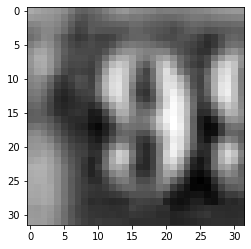

In [24]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [25]:
#Predicting the digits
keras_model.predict_classes(X_test)[5]

9

#### Image 2

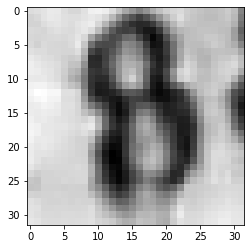

In [26]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [27]:
#Predicting the digits
keras_model.predict_classes(X_test)[10]

8

#### Image 3

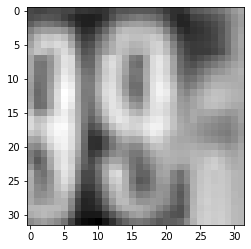

In [28]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [29]:
#Predicting the digits
keras_model.predict_classes(X_test)[112]

9

In [30]:
#Predicting for all images
y_pred=keras_model.predict_classes(X_test)
print(y_pred)

[1 7 2 ... 7 5 2]


# Conclusion

* Using NN with batchNormalization we got 78.2 accuracy
* Batch normalization provided better accuracy over dropout technique
* Relu function provided better accuracy over other activation function
* Adam optimizer provided better convergence than other optimizers 
* Relu+Adam+he_uniform is nice combination to have for this problem based on accuracy and perfomance optimization for this model